[  100   252   631  1585  3982 10000]


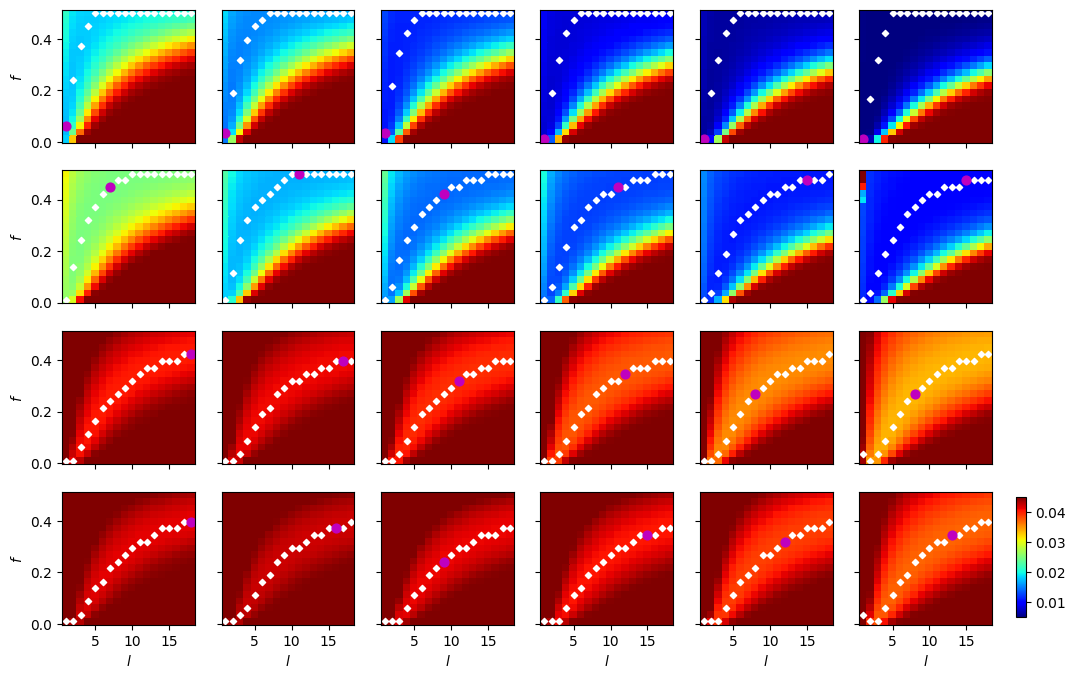

In [1]:
#%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

Ls=np.arange(2,20)
pas=np.linspace(0.4999,0.01,20)


dotheory=False
m=0
s0=0

dataNames=['MNIST','Fashion','CIFAR','CIFARG']

Ps=np.ceil(np.power(10,np.linspace(2,4,6))).astype(int)
Ns=2*Ps
#Ps=np.power(2,np.linspace(4,12,6)).astype(int)
#Ns=5*Ps

print(Ps)

fig,ax=plt.subplots(4,6,figsize=(12,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps):
            
            
        N=Ns[i]
        filename='exp_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        #filename='exp_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
        st=np.load('./sweep_data/'+filename)
        errAf=st['errAf']

        minid=np.argmin(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmin(), errAf.shape)
        

        im=ax[j][i].pcolor(st['Ls']-1,st['pas'],errAf,cmap='jet',vmax=0.045,vmin=0.005)
        ax[j][i].scatter(st['Ls']-1,st['pas'][minid],c='w',marker='D',s=10)
        ax[j][i].scatter(st['Ls'][glomin[1]]-1,st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

x1=0.92
y1=0.12
w1=0.008
h1=0.15
cax = fig.add_axes([x1,y1,w1,h1])
plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')


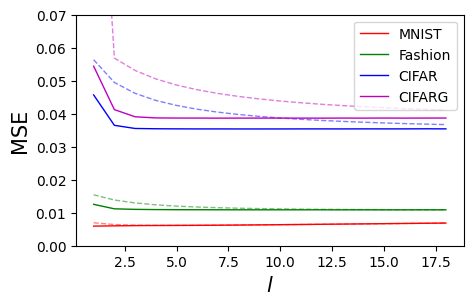

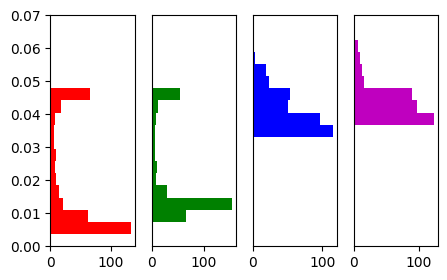

In [2]:
clrs=['r','g','b','m']
chosenpidx=4
fig,ax=plt.subplots(1,1,figsize=(5,3))
fig2,ax2=plt.subplots(1,4,figsize=(5,3))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate([Ps[chosenpidx]]):
        N=P*2
        filename='exp_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        errAf=st['errAf']

        minid=np.argmin(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmin(), errAf.shape)
         
        ax.plot(st['Ls']-1,minerr,'-',label=dataName,c=clrs[j],lw=1)
        ax.plot(st['Ls']-1,errAf[0,:],'--',c=clrs[j],markersize=1,alpha=0.5,lw=1)
        #ax[1].plot(st['pas'],errAf[:,chosenlidx],'o-')
        ax2[j].hist(errAf.flatten(), bins=np.linspace(0,0.07,20), orientation="horizontal",alpha=1,facecolor=clrs[j]);
        
        #ax2[j].set_xticks([])
        if j>0:
            ax2[j].set_yticks([])
        #ax2[j].set_box_aspect(4)
        ax2[j].set_ylim([0,0.07])

        
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')
ax.set_ylim([0,0.07])

ax.set_ylabel('MSE',fontsize=15)
ax.set_xlabel(r'$l$',fontsize=15)

ax.legend()




0.7866268018024992


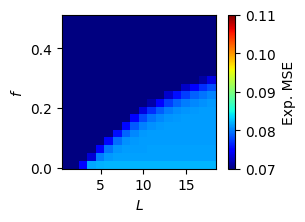

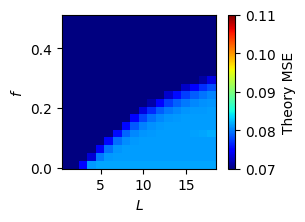

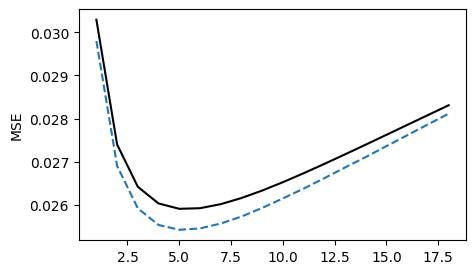

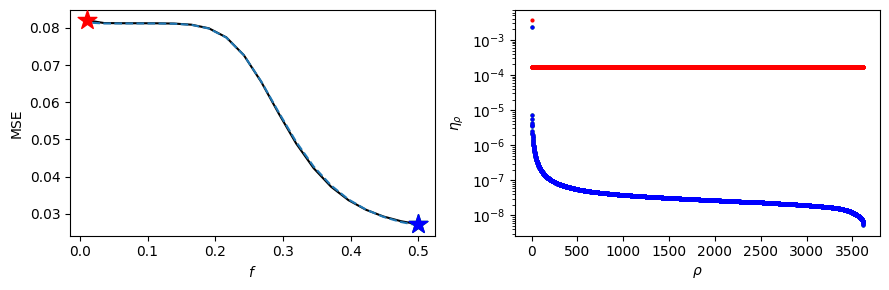

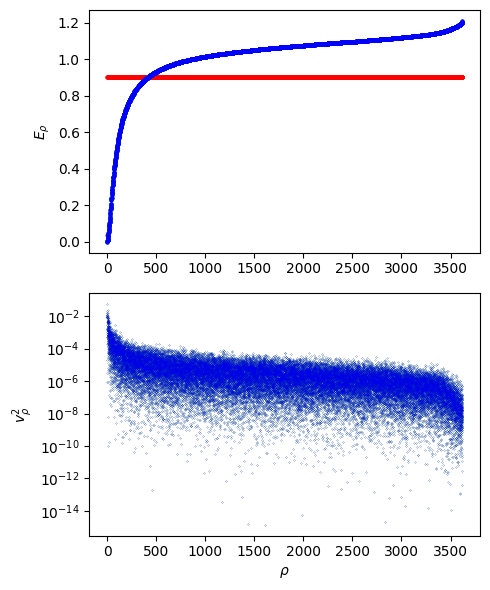

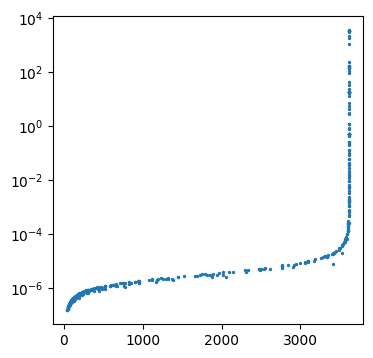

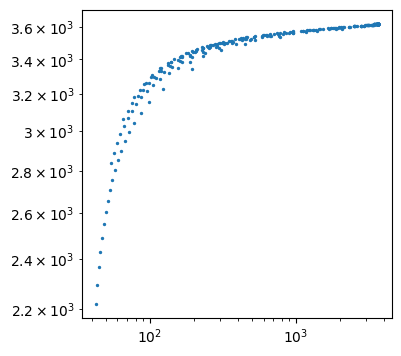

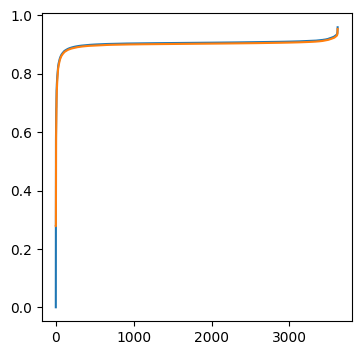

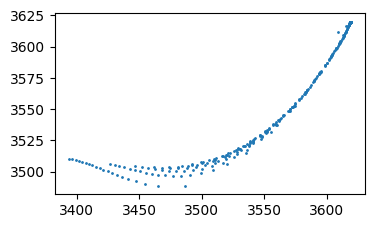

In [3]:
#P=631 #100,   252,   631,  1585,  3982, 10000
#N=2*P
#P=1000
#N=1200
P=362#[  16   48  147  445 1351 4096] #362*10
N=P*10#[   80   240   735  2225  6755 20480]
m=0
s0=0
#dataName='CIFAR'
dataName='MNIST'
Nes=np.arange(N)
filename='exp_theory_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
#filename='withacc_exp_theory_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
#filename='ZEROMEAN_EXP_withacc_exp_theory_CIFAR_P631_N1262_m0_s00.npz'
#filename='withacc_exp_theory_CIFAR_P631_N1262_m0_s00.npz'
#filename='AC_withacc_exp_theory_CIFAR_P600_N1200_m0_s00.npz'
st=np.load('./sweep_data/'+filename)
errAf=st['errAf']
errTf=st['errTf']
ERO=st['ERO']
etas=st['etas']
VT=st['VT']

#fig,ax=plt.subplots(1,1,figsize=(4,4))
#im=ax.pcolor(st['Ls'],st['pas'],errAf,cmap='jet')#,vmax=0.045,vmin=0.005)
#ax.set_box_aspect(1)

#fig,ax=plt.subplots(1,1,figsize=(4,4))
#im=ax.pcolor(st['Ls'],st['pas'],errTf,cmap='jet')#,vmax=0.045,vmin=0.005)
#ax.set_box_aspect(1)

vmaxv=0.11
vminv=0.070

fig,ax=plt.subplots(1,1,figsize=(3,2))
im=ax.pcolor(Ls-1,pas,(errAf),cmap='jet',vmax=vmaxv,vmin=vminv)
cb=fig.colorbar(im, ax=ax)
cb.set_label('Exp. MSE')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$f$')
ax.set_box_aspect(1)


fig,ax=plt.subplots(1,1,figsize=(3,2))
im=ax.pcolor(Ls-1,pas,(errTf),cmap='jet',vmax=vmaxv,vmin=vminv)
cb=fig.colorbar(im, ax=ax)
cb.set_label('Theory MSE')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$f$')
ax.set_box_aspect(1)


Lidx=12#3#13

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(Ls-1,errAf[0,:],'k-',markersize=5)
ax.plot(Ls-1,errTf[0,:],'--',markersize=5)
#ax.plot(errAf[idx,:],c='k')
#ax.plot(errTf[idx,:],c='r')
#ax[0].set_yscale('log')
ax.set_ylabel('MSE')


fig,ax=plt.subplots(1,2,figsize=(9,3))
ax[0].plot(pas,errAf[:,Lidx],'k-',markersize=5)
ax[0].plot(pas,errTf[:,Lidx],'--',markersize=5)
#ax.plot(errAf[idx,:],c='k')
#ax.plot(errTf[idx,:],c='r')
#ax[0].set_yscale('log')
ax[0].set_ylabel('MSE')

fidx0=0
fidx1=np.argmin(errAf[:,Lidx])
fidx2=-1

ax[0].scatter(pas[fidx0],errAf[fidx0,Lidx],c='g',marker='*',s=200,zorder=10)
ax[0].scatter(pas[fidx1],errAf[fidx1,Lidx],c='b',marker='*',s=200,zorder=10)
ax[0].scatter(pas[fidx2],errAf[fidx2,Lidx],c='r',marker='*',s=200,zorder=10)


#fig,ax=plt.subplots(1,1,figsize=(5,3))
ax[1].plot(Nes+1,etas[fidx0,Lidx,:],'o',c='g',zorder=10,markersize=2)
ax[1].plot(Nes+1,etas[fidx1,Lidx,:],'o',c='b',zorder=10,markersize=2)
ax[1].plot(Nes+1,etas[fidx2,Lidx,:],'o',c='r',zorder=0,markersize=2)
ax[1].set_yscale('log')
#ax.set_xscale('log')
ax[1].set_ylabel(r'$\eta_\rho$')

#ax[1].set_xlim([-10,500])

ax[0].set_xlabel(r'$f$')
ax[1].set_xlabel(r'$\rho$')

plt.tight_layout()



fig,ax=plt.subplots(2,1,figsize=(5,6))
#fig,ax=plt.subplots(1,1,figsize=(5,3))
ax[0].plot(Nes+1,ERO[fidx0,Lidx,:],'o',c='g',zorder=10,markersize=2)
ax[0].plot(Nes+1,ERO[fidx1,Lidx,:],'o',c='b',zorder=10,markersize=2)
ax[0].plot(Nes+1,ERO[fidx2,Lidx,:],'o',c='r',zorder=0,markersize=2)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax[0].set_ylabel(r'$E_\rho$')


#ax.set_ylim([0.48,0.53])
#fig,ax=plt.subplots(1,1,figsize=(5,3))
ax[1].plot(Nes+1,np.square(VT[fidx0,Lidx,:]),'o',c='g',zorder=10,markersize=0.1)
ax[1].plot(Nes+1,np.square(VT[fidx1,Lidx,:]),'o',c='b',zorder=10,markersize=0.1)
#ax[1].plot(Nes+1,np.square(VT[fidx2,Lidx,:]),'o',c='r',zorder=10,markersize=0.1)


#ax.set_xscale('log')
ax[1].set_yscale('log')
#ax[1].set_ylim([1e-8,2])
ax[1].set_ylabel(r'$v^2_\rho$')

#ax[0].set_xlim([-10,1000])
#ax[1].set_xlim([-10,1000])
ax[1].set_xlabel(r'$\rho$')


plt.tight_layout()

#fig,ax=plt.subplots(1,1,figsize=(4,4))
#ax.scatter(np.square(VT[fidx0,Lidx,:]),np.square(VT[fidx1,Lidx,:]),s=1,alpha=0.2)
#ax.set_xscale('log')
#ax.set_yscale('log')

def getED(x):
    return np.square(np.sum(x,axis=1))/np.sum(np.square(x),axis=1)

erof=np.reshape(ERO,(-1,N))[:,1:]
etaf=np.reshape(etas,(-1,N))[:,1:]

alpha=P/N
#eta_from_ero=-1/(2*alpha*(1-alpha)) * (erof - (1-alpha))
eta_from_ero=-1/(2*alpha*(1-alpha)) * (erof - np.mean(erof,axis=1)[:,None])
bias_eta=np.mean(etaf)-np.mean(eta_from_ero)
etafe=eta_from_ero+bias_eta

fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.scatter(getED(etaf),getED(etafe),s=2)
ax.set_yscale('log')
#ax.set_xscale('log')

erots=np.reshape(ERO,(-1,N))[:,1:]
etat=np.reshape(etas,(-1,N))[:,1:]

erots=-(erots-(1-P/N))+(1-P/N)

fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.scatter(getED(etat),getED(erots),s=2)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_aspect('equal')

EROflat=np.reshape(ERO,(-1,N))#[:,1:]
dEr=np.reshape(ERO,(-1,N))[:,1:]-(1-P/N)
etaflat=np.reshape(etas,(-1,N))#[:,1:]
#deta=-(etaflat-np.mean(etaflat,axis=1)[:,None])
deta=-(etaflat-etaflat[:,1][:,None])

#etaflat=np.array(etaflat/(etaflat[:,1][:,None]))
etaflat=np.array(etaflat/(np.mean(etaflat[:,1:],axis=1)[:,None]))
etaflat[:,0]=etaflat[:,1]#etan[1]
alpha=P/N
erots=(1-alpha)*( 1-2*( (etaflat-1) - np.mean(etaflat-1,axis=1)[:,None]  )*alpha )

EROT=np.squeeze(erots)
EROT=np.where(EROT>0,EROT,0)
#DERO=-1*( (eta-1) - np.mean(eta-1) ) * 2*alpha*(1-alpha)

fig,ax=plt.subplots(1,1,figsize=(4,4))
#ax.scatter(EROflat[310,:],EROT[310,:])
#ax.plot([0,1],[0,1],'k')
ax.plot(EROflat[258,:])
ax.plot(EROT[258,:])
#ax.scatter(getED(dEr),getED(deta))

fig,ax=plt.subplots(1,1,figsize=(4,4))
#ax.scatter(EROflat[310,:],EROT[310,:])
#ax.plot([0,1],[0,1],'k')
ax.scatter(getED(EROflat),getED(EROT),s=1)
#ax.scatter(getED(dEr),geta
ax.set_aspect('equal')

EROflatn=EROflat-np.mean(EROflat,axis=1)[:,None]
EROTn=EROT-np.mean(EROT,axis=1)[:,None]
EROflatn=EROflatn/(np.sqrt(np.sum(np.square(EROflatn),axis=1))[:,None])
EROTn=EROTn/(np.sqrt(np.sum(np.square(EROTn),axis=1))[:,None])

print(np.mean(np.diag(np.matmul(EROflatn,EROTn.T))))



[  100   252   631  1585  3982 10000]


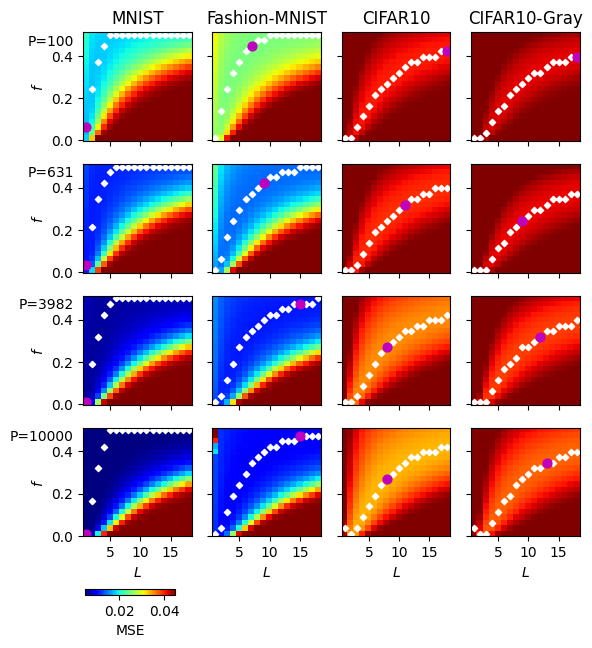

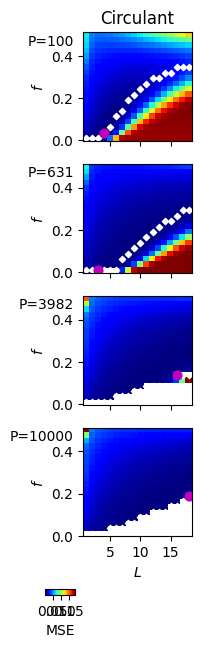

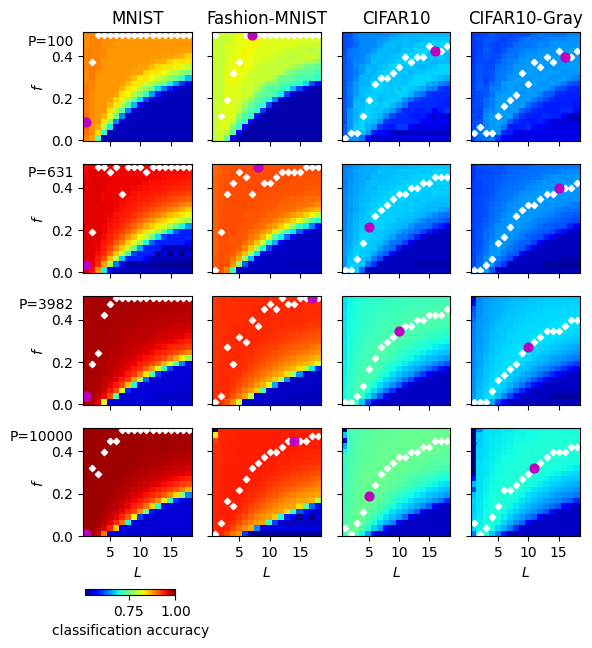

In [4]:
#new style

import numpy as np
import matplotlib.pyplot as plt

dotheory=False
m=0
s0=0

dataNames=['MNIST','Fashion','CIFAR','CIFARG']

Ps=np.ceil(np.power(10,np.linspace(2,4,6))).astype(int)
Ns=2*Ps

print(Ps)

#fig,ax=plt.subplots(6,4,figsize=(6,9))
fig,ax=plt.subplots(4,4,figsize=(6,6))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps[[0,2,4,5]]):
            
            
        N=2*P
        filename='withacc_exp_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        errAf=st['errAf']

        minid=np.argmin(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmin(), errAf.shape)
        

        im=ax[i][j].pcolor(st['Ls']-1,st['pas'],errAf,cmap='jet',vmax=0.045,vmin=0.005)
        ax[i][j].scatter(st['Ls']-1,st['pas'][minid],c='w',marker='D',s=10)
        ax[i][j].scatter(st['Ls'][glomin[1]]-1,st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if i<np.shape(ax)[1]-1:
            ax[i][j].xaxis.set_ticklabels([])
        else:
            ax[i][j].set_xlabel(r'$L$')
        if j>0:
            ax[i][j].yaxis.set_ticklabels([])
        else:
            ax[i][j].set_ylabel(r'$f$')
            ax[i][0].text(-1, 0.45, 'P={}'.format(P), fontsize=10, horizontalalignment='right')
        ax[i][j].set_box_aspect(1)
        #ax[i][0].set_title('P={}'.format(Ps[i]), loc='left')

        
#fig.subplots_adjust(left=0.25)

    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

ax[0][0].set_title('MNIST')
ax[0][1].set_title('Fashion-MNIST')
ax[0][2].set_title('CIFAR10')
ax[0][3].set_title('CIFAR10-Gray')
plt.tight_layout()

x1=0.15
y1=0.0
w1=0.15
h1=0.01
cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5,orientation='horizontal')
cb.set_label('MSE')
###

s0c=1.1
fig,ax=plt.subplots(4,1,figsize=(2,6))
dataName='Circulant'
for i, P in enumerate(Ps[[0,2,4,5]]):
    N=2*P
    filename='exp_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0c)
    st=np.load('./sweep_data/'+filename)
    errAf=st['errAf']

    minid=np.argmin(errAf,axis=0)
    minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
    glomin=np.unravel_index(errAf.argmin(), errAf.shape)


    im=ax[i].pcolor(st['Ls']-1,st['pas'],errAf,cmap='jet')#,vmax=0.045,vmin=0.005)
    ax[i].scatter(st['Ls']-1,st['pas'][minid],c='w',marker='D',s=10)
    ax[i].scatter(st['Ls'][glomin[1]]-1,st['pas'][glomin[0]],c='m',marker='o',s=40)

    #ax[j][i].plot(minerr,c='k')
    #cb=fig.colorbar(im, ax=ax[i])
    #cb.set_label('err experiment')
    #ax[i].set_xlabel('L')
    #ax[i].set_ylabel('f')
    if i<np.shape(ax)[0]-1:
        ax[i].xaxis.set_ticklabels([])
    else:
        ax[i].set_xlabel(r'$L$')

    ax[i].set_ylabel(r'$f$')
    ax[i].text(-1, 0.45, 'P={}'.format(P), fontsize=10, horizontalalignment='right')
    ax[i].set_box_aspect(1)
        #ax[i][0].set_title('P={}'.format(Ps[i]), loc='left')
ax[0].set_title('Circulant')
plt.tight_layout()

x1=0.15
y1=0.0
w1=0.15
h1=0.01
cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5,orientation='horizontal')
cb.set_label('MSE')


###
fig,ax=plt.subplots(4,4,figsize=(6,6))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps[[0,2,4,5]]):
            
            
        N=2*P
        filename='withacc_exp_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        accAf=st['accAf']

        maxid=np.argmax(accAf,axis=0)
        maxerr=accAf[maxid,np.arange(np.shape(Ls)[0])]
        glomax=np.unravel_index(accAf.argmax(), accAf.shape)
        

        im=ax[i][j].pcolor(st['Ls']-1,st['pas'],accAf,cmap='jet',vmax=1,vmin=0.52)
        ax[i][j].scatter(st['Ls']-1,st['pas'][maxid],c='w',marker='D',s=10)
        ax[i][j].scatter(st['Ls'][glomax[1]]-1,st['pas'][glomax[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if i<np.shape(ax)[1]-1:
            ax[i][j].xaxis.set_ticklabels([])
        else:
            ax[i][j].set_xlabel(r'$L$')
        if j>0:
            ax[i][j].yaxis.set_ticklabels([])
        else:
            ax[i][j].set_ylabel(r'$f$')
            ax[i][0].text(-1, 0.45, 'P={}'.format(P), fontsize=10, horizontalalignment='right')
        ax[i][j].set_box_aspect(1)
        #ax[i][0].set_title('P={}'.format(Ps[i]), loc='left')

        
#fig.subplots_adjust(left=0.25)

    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

ax[0][0].set_title('MNIST')
ax[0][1].set_title('Fashion-MNIST')
ax[0][2].set_title('CIFAR10')
ax[0][3].set_title('CIFAR10-Gray')
plt.tight_layout()

x1=0.15
y1=0.0
w1=0.15
h1=0.01
cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5,orientation='horizontal')
cb.set_label('classification accuracy')



[  100   252   631  1585  3982 10000]
MSE:0.9812, L:5
MSE:0.9814, L:2, f:0.087
MSE:0.9796, L:2, f:0.500
MSE:0.9345, L:10
MSE:0.9346, L:6, f:0.345
MSE:0.9335, L:6, f:0.500
MSE:0.7267, L:19
MSE:0.7271, L:3, f:0.010
MSE:0.6940, L:3, f:0.500
MSE:0.6810, L:19
MSE:0.6827, L:4, f:0.062
MSE:0.6552, L:4, f:0.500


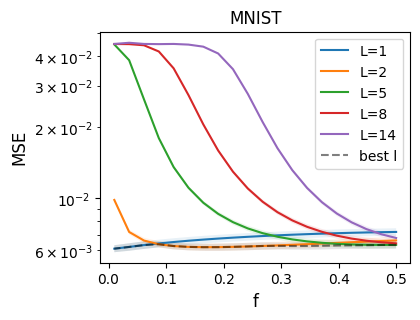

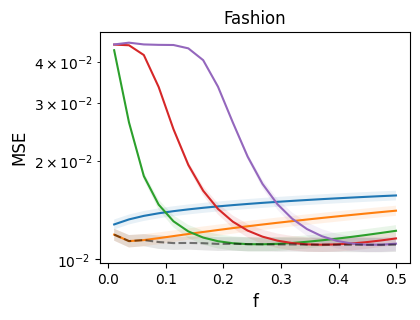

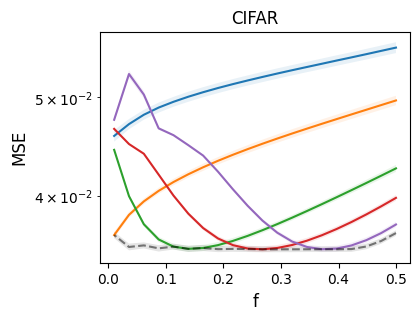

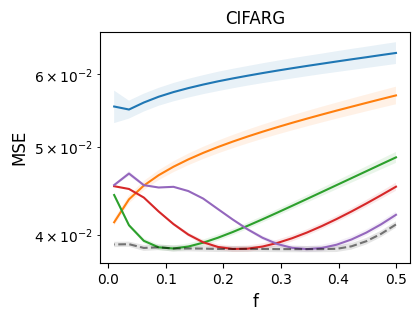

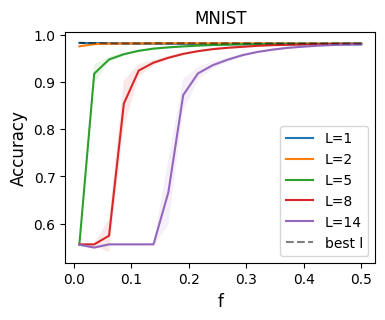

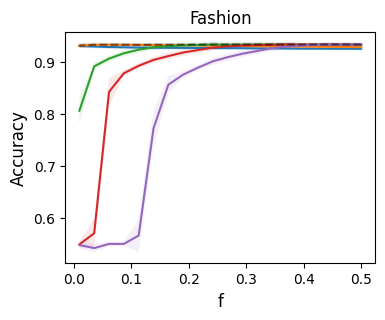

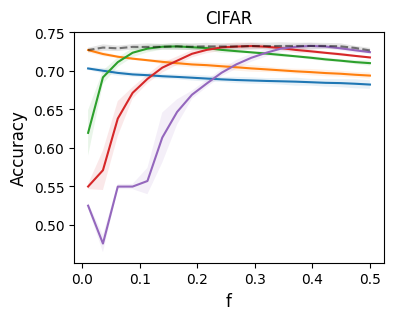

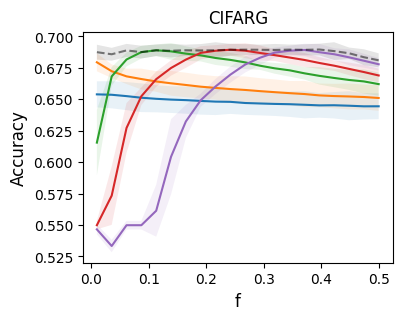

In [90]:

dotheory=False
m=0
s0=0

dataNames=['MNIST','Fashion','CIFAR','CIFARG']

Ps=np.ceil(np.power(10,np.linspace(2,4,6))).astype(int)
Ns=2*Ps

print(Ps)

lpicks=[0,1,4,7,13]

#fig,ax=plt.subplots(6,4,figsize=(6,9))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps):
        if P != Ps[-2]:
            continue
            
        N=2*P
        
        ER=[]
        for k in range(5):
            filename='line_comp_exp_'+dataName+'_P{}_N{}_m{}_s0{}_seed{}.npz'.format(P,N,m,s0,k)
            st=np.load('./sweep_data/'+filename)
            errAf=st['errAf']
            
            ER.append(errAf)
            
        meanER=np.mean(np.array(ER),axis=0) 
        stdER=np.std(np.array(ER),axis=0)
        
        mid=np.argmin(meanER,axis=1)
        bmu=meanER[np.arange(np.shape(st['pas'])[0]),mid]
        bci=2*stdER[np.arange(np.shape(st['pas'])[0]),mid]
        
        fig,ax=plt.subplots(1,1,figsize=(4,3))
        for l in lpicks:
            mu=meanER[:,l]
            ci=2*stdER[:,l]
            ax.plot(st['pas'],mu,label='L={}'.format(st['Ls'][l]-1))
            ax.fill_between(st['pas'], (mu-ci), (mu+ci), alpha=.1)
            
        ax.plot(st['pas'],bmu,c='k',ls='--',alpha=0.5,label='best l')
        ax.fill_between(st['pas'], (bmu-bci), (bmu+bci), alpha=.1, facecolor='k')
        
        if j==0:
            ax.legend()
        ax.set_title(dataName)
        ax.set_yscale('log')
        ax.set_ylabel('MSE',fontsize=12)
        ax.set_xlabel('f',fontsize=12)

        

#fig,ax=plt.subplots(6,4,figsize=(6,9))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps):
        if P != Ps[-2]:
            continue
            
        N=2*P
        
        AC=[]
        for k in range(5):
            filename='line_comp_exp_'+dataName+'_P{}_N{}_m{}_s0{}_seed{}.npz'.format(P,N,m,s0,k)
            st=np.load('./sweep_data/'+filename)
            accAf=st['accAf']
            AC.append(accAf)
            

        meanAC=np.mean(np.array(AC),axis=0) 
        stdAC=np.std(np.array(AC),axis=0)
        
        mid=np.argmax(meanAC,axis=1)
        bmu=meanAC[np.arange(np.shape(st['pas'])[0]),mid]
        bci=2*stdAC[np.arange(np.shape(st['pas'])[0]),mid]
        
        fig,ax=plt.subplots(1,1,figsize=(4,3))
        for l in lpicks:
            mu=meanAC[:,l]
            ci=2*stdAC[:,l]
            ax.plot(st['pas'],mu,label='L={}'.format(st['Ls'][l]-1))
            ax.fill_between(st['pas'], (mu-ci), (mu+ci), alpha=.1)
            
        ax.plot(st['pas'],bmu,c='k',ls='--',alpha=0.5,label='best l')
        ax.fill_between(st['pas'], (bmu-bci), (bmu+bci), alpha=.1, facecolor='k')
        
        if j==0:
            ax.legend()
        ax.set_title(dataName)
        ax.set_ylabel('Accuracy',fontsize=12)
        ax.set_xlabel('f',fontsize=12)
        
        id_densebest=np.argmax(meanAC[0,:])
        L_densebest=st['Ls'][id_densebest]
        ac_densebest=meanAC[0,id_densebest]
        
        nanmeanAC=np.copy(meanAC)
        nanmeanAC[0,:]=np.nan
        id_sparsebest=np.unravel_index(np.nanargmax(nanmeanAC), nanmeanAC.shape)
        L_sparsebest=st['Ls'][id_sparsebest[1]]
        ac_sparsebest=meanAC[id_sparsebest]
        
        nan_equiv=np.where(meanAC-ac_densebest<0,np.nan,np.ones(np.shape(meanAC)[0])[:,None]*np.arange(np.shape(meanAC)[1])[None,:])
        id_sparseequiv=np.unravel_index(np.nanargmin(nan_equiv), nanmeanAC.shape)
        L_sparseequiv=st['Ls'][id_sparseequiv[1]]
        ac_sparseequiv=meanAC[id_sparseequiv]
        
        print('MSE:{:.4f}, L:{}'.format(ac_densebest,L_densebest))
        #print('MSE:{:.4f}, L:{}'.format(ac_sparsebest,L_sparsebest))
        print('MSE:{:.4f}, L:{}, f:{:.3f}'.format(ac_sparseequiv,L_sparseequiv,st['pas'][id_sparseequiv[0]]))
        print('MSE:{:.4f}, L:{}, f:{:.3f}'.format(meanAC[0,id_sparseequiv[1]],L_sparseequiv,0.5))



In [111]:
Ps=np.array([100,200,500,1000,2000,5000,10000])
seeds=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]


dotheory=False
m=0
s0=0

dataNames=['MNIST','CIFAR']

#Ps=np.ceil(np.power(10,np.linspace(2,4,6))).astype(int)
#Ns=2*Ps

print(Ps)

lpicks=[0,1,4,7,13]

#fig,ax=plt.subplots(6,4,figsize=(6,9))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    print(dataName)
    for i, P in enumerate(Ps):
        #if P != Ps[-2]:
        #    continue
        N=int(10000+P)
        
        ER=[]
        AC=[]
        for k in range(9):
            if k==0:
                filename='gb_comp_exp_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
            else:
                filename='gb_comp_exp_'+dataName+'_P{}_N{}_m{}_s0{}_seed{}.npz'.format(P,N,m,s0,k)
            st=np.load('./sweep_data/'+filename)
            errAf=st['errAf']
            ER.append(errAf)
            accAf=st['accAf']
            AC.append(accAf)
            
        meanER=np.mean(np.array(ER),axis=0) 
        stdER=np.std(np.array(ER),axis=0)
        meanAC=np.mean(np.array(AC),axis=0) 
        stdAC=np.std(np.array(AC),axis=0)
        
        
        id_densebest=np.argmax(meanAC[0,:])
        L_densebest=st['Ls'][id_densebest]-1
        ac_densebest=meanAC[0,id_densebest]
        acst_densebest=stdAC[0,id_densebest]

        nanmeanAC=np.copy(meanAC)
        nanmeanAC[0,:]=np.nan
        id_sparsebest=np.unravel_index(np.nanargmax(nanmeanAC), nanmeanAC.shape)
        L_sparsebest=st['Ls'][id_sparsebest[1]]-1
        ac_sparsebest=meanAC[id_sparsebest]
        acst_sparsebest=stdAC[id_sparsebest]
        
        nan_equiv=np.where(meanAC-ac_densebest<0,np.nan,np.ones(np.shape(meanAC)[0])[:,None]*np.arange(np.shape(meanAC)[1])[None,:])
        id_sparseequiv=np.unravel_index(np.nanargmin(nan_equiv), nanmeanAC.shape)
        L_sparseequiv=st['Ls'][id_sparseequiv[1]]-1
        ac_sparseequiv=meanAC[id_sparseequiv]
        acst_sparseequiv=stdAC[id_sparseequiv]
        print(P)
        print('MSE:{:.4f}, STD:{:.4f}, L:{}, f:0.500'.format(ac_densebest,acst_densebest,L_densebest))
        print('MSE:{:.4f}, STD:{:.4f}, L:{}, f:{:.3f}'.format(ac_sparseequiv,acst_sparseequiv,L_sparseequiv,st['pas'][id_sparseequiv[0]]))
        print('MSE:{:.4f}, STD:{:.4f}, L:{}, f:{:.3f}'.format(meanAC[0,id_sparseequiv[1]],stdAC[0,id_sparseequiv[1]],L_sparseequiv,0.5))
        #print('MSE:{:.4f}, STD:{:.4f}, L:{}, f:{:.3f}'.format(ac_sparsebest,acst_sparsebest,L_sparsebest,st['pas'][id_sparsebest[0]]))



[  100   200   500  1000  2000  5000 10000]
MNIST
100
MSE:0.7545, STD:0.0317, L:7, f:0.500
MSE:0.7560, STD:0.0293, L:1, f:0.139
MSE:0.7292, STD:0.0273, L:1, f:0.500
200
MSE:0.8313, STD:0.0143, L:8, f:0.500
MSE:0.8327, STD:0.0149, L:1, f:0.139
MSE:0.8034, STD:0.0142, L:1, f:0.500
500
MSE:0.8989, STD:0.0052, L:6, f:0.500
MSE:0.8993, STD:0.0046, L:1, f:0.139
MSE:0.8836, STD:0.0037, L:1, f:0.500
1000
MSE:0.9300, STD:0.0028, L:5, f:0.500
MSE:0.9303, STD:0.0025, L:1, f:0.139
MSE:0.9227, STD:0.0015, L:1, f:0.500
2000
MSE:0.9493, STD:0.0022, L:3, f:0.500
MSE:0.9495, STD:0.0021, L:1, f:0.113
MSE:0.9456, STD:0.0021, L:1, f:0.500
5000
MSE:0.9661, STD:0.0017, L:5, f:0.500
MSE:0.9664, STD:0.0016, L:1, f:0.087
MSE:0.9634, STD:0.0015, L:1, f:0.500
10000
MSE:0.9748, STD:0.0014, L:3, f:0.500
MSE:0.9749, STD:0.0013, L:1, f:0.087
MSE:0.9725, STD:0.0013, L:1, f:0.500
CIFAR
100
MSE:0.2428, STD:0.0135, L:18, f:0.500
MSE:0.2429, STD:0.0127, L:6, f:0.294
MSE:0.2321, STD:0.0118, L:6, f:0.500
200
MSE:0.2845, ST

[  100   252   631  1585  3982 10000]


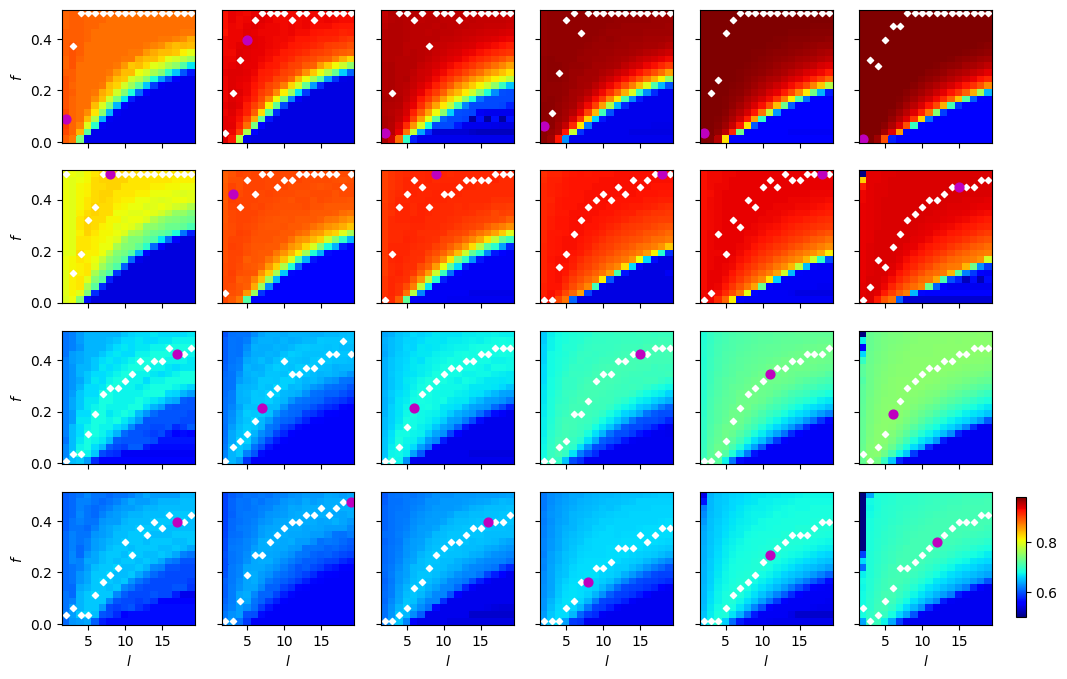

In [5]:

dotheory=False
m=0
s0=0

dataNames=['MNIST','Fashion','CIFAR','CIFARG']

Ps=np.ceil(np.power(10,np.linspace(2,4,6))).astype(int)
Ns=2*Ps

print(Ps)

fig,ax=plt.subplots(4,6,figsize=(12,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps):
            
            
        N=Ns[i]
        filename='withacc_'+'exp_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        accAf=st['accAf']

        minid=np.argmax(accAf,axis=0)
        minerr=accAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(accAf.argmax(), accAf.shape)
        

        im=ax[j][i].pcolor(st['Ls'],st['pas'],accAf,cmap='jet',vmax=0.98,vmin=0.5)
        ax[j][i].scatter(st['Ls'],st['pas'][minid],c='w',marker='D',s=10)
        ax[j][i].scatter(st['Ls'][glomin[1]],st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
        
    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

x1=0.92
y1=0.12
w1=0.008
h1=0.15
cax = fig.add_axes([x1,y1,w1,h1])
plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')


In [6]:
Ls=np.arange(2,20)
pas=np.linspace(0.4999,0.01,20)

dotheory=True
if dotheory:
    theory_or_not='exp_theory_'
else:
    theory_or_not='exp_'
    
i=2
for P in [Ps[i]]:
    N=Ns[i]
    filename=theory_or_not+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
    st=np.load('./sweep_data/'+filename)
    
    alpha=P/N
    
    ERO=np.zeros((np.shape(pas)[0],np.shape(Ls)[0],N))
    EROT=np.zeros((np.shape(pas)[0],np.shape(Ls)[0],N))
    DERO=np.zeros((np.shape(pas)[0],np.shape(Ls)[0],N))
    Egt=np.zeros((np.shape(pas)[0],np.shape(Ls)[0]))
    for j, _ in enumerate(pas):
        for g, _ in enumerate(Ls):
            eta=st['etas'][j,g,:]
            vteach=st['VT'][j,g,:,:]
            ERO[j,g,:]=st['ERO'][j,g,:]
            #eta[0]=np.copy(eta[1])
            #eta=np.array(eta/eta[1])
            mueta=np.mean(eta[1:])
            eta=np.array(eta/mueta)
            eta[0]=np.copy(mueta)
            erots=(1-alpha)*( 1-2*( (eta-1) - np.mean(eta-1)  )*alpha )
            erots=np.where(erots<0,0,erots)
            EROT[j,g,:]=np.squeeze(erots)
            DERO[j,g,:]=-1*( (eta-1) - np.mean(eta-1) ) * 2*alpha*(1-alpha)
            Egt[j,g]=np.mean(np.dot(erots,np.square(vteach)))
            #eta=st['etas'][j,g,:]
            #eta[0]=eta[1]
            #v2=np.square(st['VT'][j,g,:,:])
            #a=np.sum(eta[:,None]*v2,axis=0)/np.sum(np.square(eta))
            #a=np.mean(a)
            #Egt[j,g]=np.mean(np.sqrt(np.mean(np.square(a*eta[:,None]-np.square(vteach)),axis=0)))
    

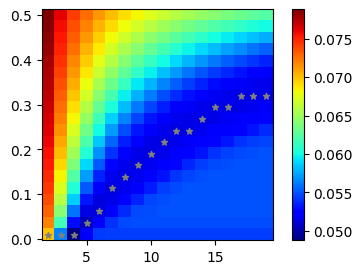

In [7]:
fig,ax=plt.subplots(1,1,figsize=(5,3))
minid=np.argmin(Egt,axis=0)
im=ax.pcolor(st['Ls'],st['pas'],Egt,cmap='jet')#,vmax=0.05,vmin=0.01)
ax.scatter(st['Ls'],st['pas'][minid],c='gray',marker='*',s=20)
cb=fig.colorbar(im, ax=ax)
#cb.set_label('err experiment')
#ax[i].set_xlabel('L')
#ax[i].set_ylabel('f')
ax.set_box_aspect(1)


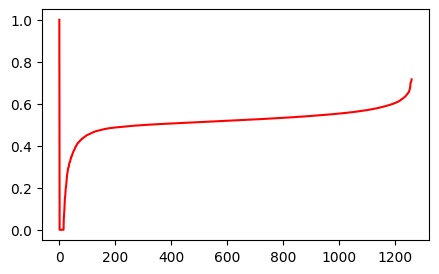

In [8]:
j=10
g=10
fig,ax=plt.subplots(1,1,figsize=(5,3))
#ax.plot(ERO[j,g,:],c='k')
ax.plot(EROT[j,g,:],c='r')


FileNotFoundError: [Errno 2] No such file or directory: './sweep_data/finite_CIFARG_P100_N200_wwidth20000.npz'

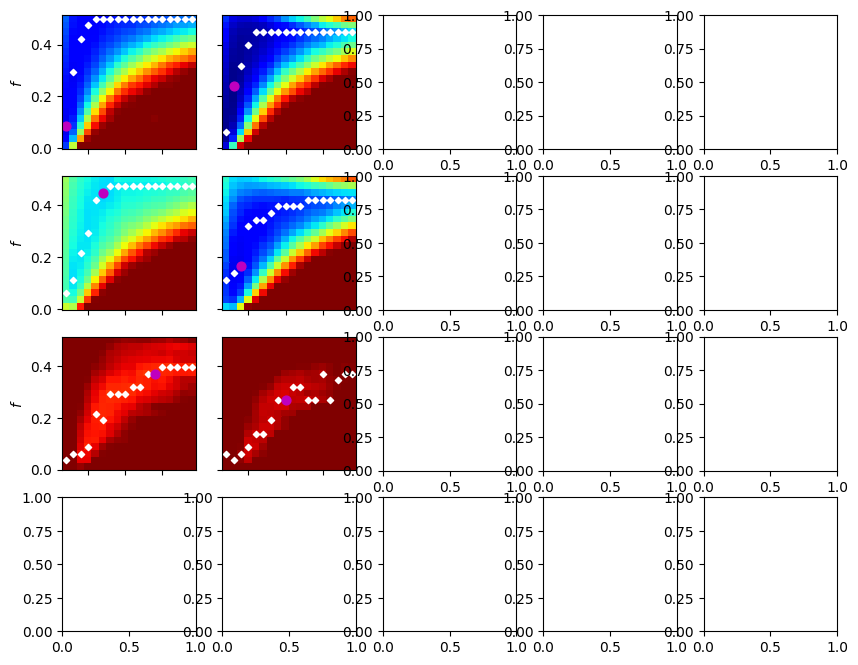

In [9]:
wwidth=20000
fig,ax=plt.subplots(4,5,figsize=(10,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps[:2]):
            
            
        N=Ns[i]
        filename='finite_'+dataName+'_P{}_N{}_wwidth{}.npz'.format(P,N,wwidth)
        st=np.load('./sweep_data/'+filename)
        errAf=st['errAf']

        minid=np.argmin(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmin(), errAf.shape)
        

        im=ax[j][i].pcolor(st['Ls'],st['pas'],errAf,cmap='jet',vmax=0.045,vmin=0.015)
        ax[j][i].scatter(st['Ls'],st['pas'][minid],c='w',marker='D',s=10)
        ax[j][i].scatter(st['Ls'][glomin[1]],st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

x1=0.92
y1=0.12
w1=0.008
h1=0.15
cax = fig.add_axes([x1,y1,w1,h1])
plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')


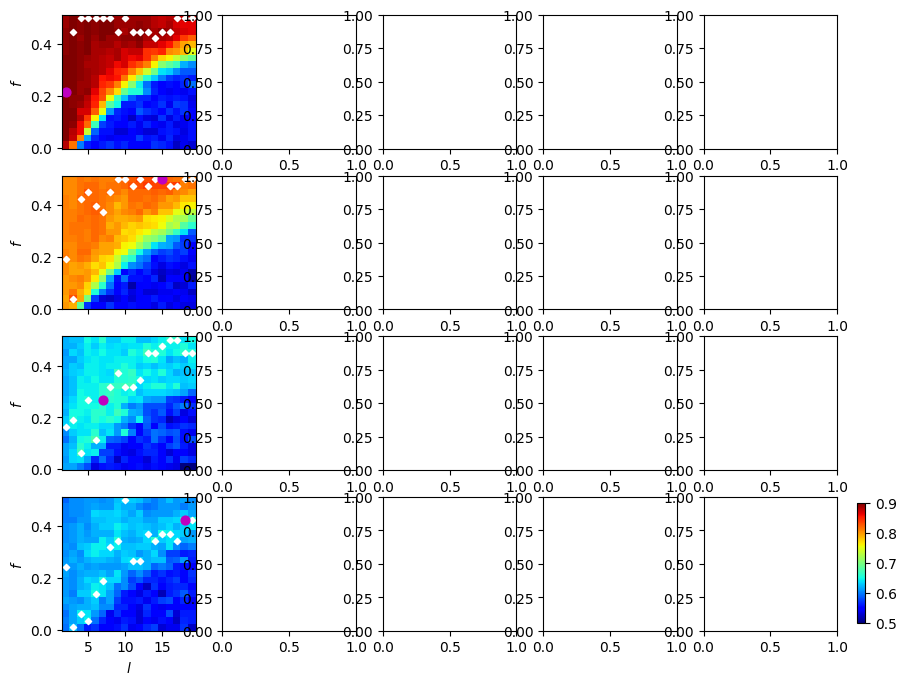

In [10]:
wwidth=15000
fig,ax=plt.subplots(4,5,figsize=(10,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps[:1]):
            
            
        N=Ns[i]
        filename='finite_'+dataName+'_P{}_N{}_wwidth{}.npz'.format(P,N,wwidth)
        st=np.load('./sweep_data/'+filename)
        errAf=st['acc']

        minid=np.argmax(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmax(), errAf.shape)
        

        im=ax[j][i].pcolor(st['Ls'],st['pas'],errAf,cmap='jet',vmax=0.9,vmin=0.5)
        ax[j][i].scatter(st['Ls'],st['pas'][minid],c='w',marker='D',s=10)
        ax[j][i].scatter(st['Ls'][glomin[1]],st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

x1=0.92
y1=0.12
w1=0.008
h1=0.15
cax = fig.add_axes([x1,y1,w1,h1])
plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')


/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


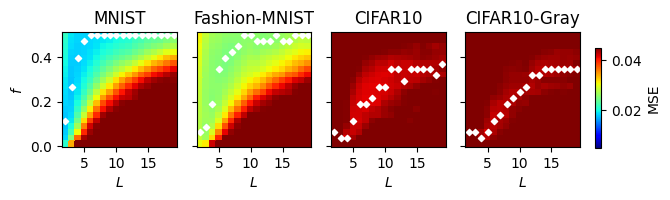

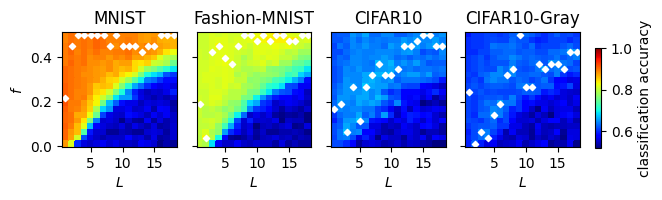

In [11]:
wwidth=15000
#vmaxs=[0.05, 0.05, 0.06, 0.06]
#vmins=[0.01, 0.02, 0.04, 0.04]
fig,ax=plt.subplots(1,4,figsize=(6,2))
for j,dataName in enumerate(dataNames):
            
        P=100
        N=2*P
        filename='finite_'+dataName+'_P{}_N{}_wwidth{}.npz'.format(P,N,wwidth)
        st=np.load('./sweep_data/'+filename)
        errAf=st['errAf']

        minid=np.argmin(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmin(), errAf.shape)
        

        im=ax[j].pcolor(st['Ls'],st['pas'],errAf,cmap='jet',vmax=0.045,vmin=0.005)
        #im=ax[j].pcolor(st['Ls'],st['pas'],errAf,cmap='jet',vmax=vmaxs[j],vmin=vmins[j])
        #cb=fig.colorbar(im, ax=ax[j])
        
        ax[j].scatter(st['Ls'],st['pas'][minid],c='w',marker='D',s=10)
        #ax[j].scatter(st['Ls'][glomin[1]],st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j].plot(minerr,c='k')
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        ax[j].set_xlabel(r'$L$')
        
        if j>=1:
            ax[j].yaxis.set_ticklabels([])
        ax[j].set_box_aspect(1)
ax[0].set_ylabel(r'$f$')


ax[0].set_title('MNIST')
ax[1].set_title('Fashion-MNIST')
ax[2].set_title('CIFAR10')
ax[3].set_title('CIFAR10-Gray')

x1=1
y1=0.25
w1=0.01
h1=0.5
cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')
cb.set_label('MSE')

plt.tight_layout()

cb.solids.set_rasterized(True)
plt.savefig("finite_MSE.svg")

fig,ax=plt.subplots(1,4,figsize=(6,2))
for j,dataName in enumerate(dataNames):
            
        P=100
        N=2*P
        filename='finite_'+dataName+'_P{}_N{}_wwidth{}.npz'.format(P,N,wwidth)
        st=np.load('./sweep_data/'+filename)
        accAf=st['acc']

        maxid=np.argmax(accAf,axis=0)
        maxerr=accAf[maxid,np.arange(np.shape(Ls)[0])]
        glomax=np.unravel_index(accAf.argmax(), accAf.shape)
        

        im=ax[j].pcolor(st['Ls']-1,st['pas'],accAf,cmap='jet',vmax=1.0,vmin=0.52)
        #im=ax[j].pcolor(st['Ls'],st['pas'],errAf,cmap='jet',vmax=vmaxs[j],vmin=vmins[j])
        #cb=fig.colorbar(im, ax=ax[j])
        
        ax[j].scatter(st['Ls']-1,st['pas'][maxid],c='w',marker='D',s=10)
        #ax[j].scatter(st['Ls'][glomin[1]],st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j].plot(minerr,c='k')
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        ax[j].set_xlabel(r'$L$')
        
        if j>=1:
            ax[j].yaxis.set_ticklabels([])
        ax[j].set_box_aspect(1)
ax[0].set_ylabel(r'$f$')


ax[0].set_title('MNIST')
ax[1].set_title('Fashion-MNIST')
ax[2].set_title('CIFAR10')
ax[3].set_title('CIFAR10-Gray')

x1=1
y1=0.25
w1=0.01
h1=0.5
cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')
cb.set_label('classification accuracy')

plt.tight_layout()

cb.solids.set_rasterized(True)
plt.savefig("finite_accuracy.svg")



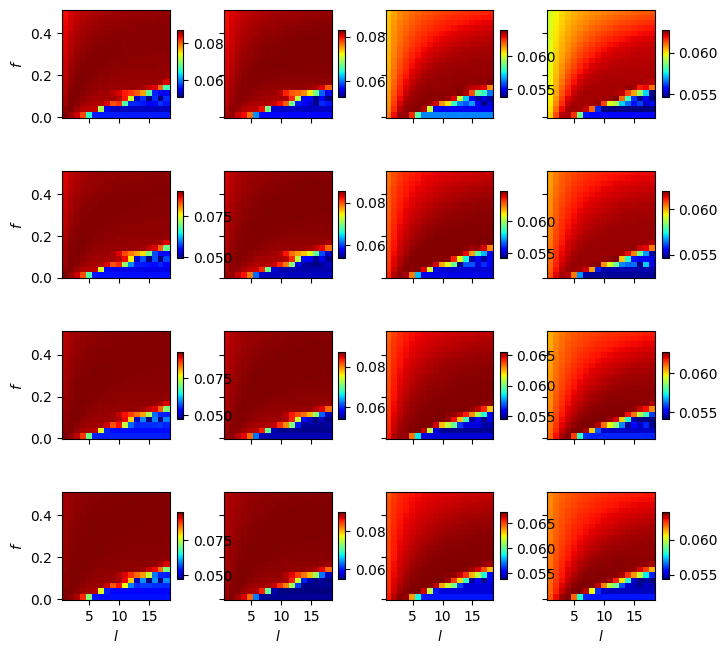

In [12]:
clrs=['r','g','b','m']
#chosenpidx=4
oid=9
fig,ax=plt.subplots(4,4,figsize=(8,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    
    for i, P in enumerate(Ps[[0,1,2,3]]):
        N=P*2
        filename='exp_theory_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        VT2=np.square(st['VT'])
        ved=np.square(np.sum(VT2,axis=2))/np.sum(np.square(VT2),axis=2)
        ved=np.mean(ved,axis=2)
        
        AUC=np.mean(np.cumsum(np.square(st['VT'])[:,:,:,:],axis=2),axis=2)
        AUC=np.mean(AUC,axis=2)
        #fig,ax=plt.subplots(1,1,figsize=(5,3))
        im=ax[i][j].pcolor(st['Ls']-1,st['pas'],AUC,cmap='jet')#,vmin=0.075)#,vmax=0.1,vmin=0.05)#,vmax=0.1,vmin=0.07)
        cb=plt.colorbar(im,ax=ax[i][j],aspect=10,shrink=0.5)#,orientation='horizontal')
        
        #fig,ax=plt.subplots(1,1,figsize=(5,3))
        #ax.plot(VT2.reshape(-1,N).T)
        #ax.set_yscale('log')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)




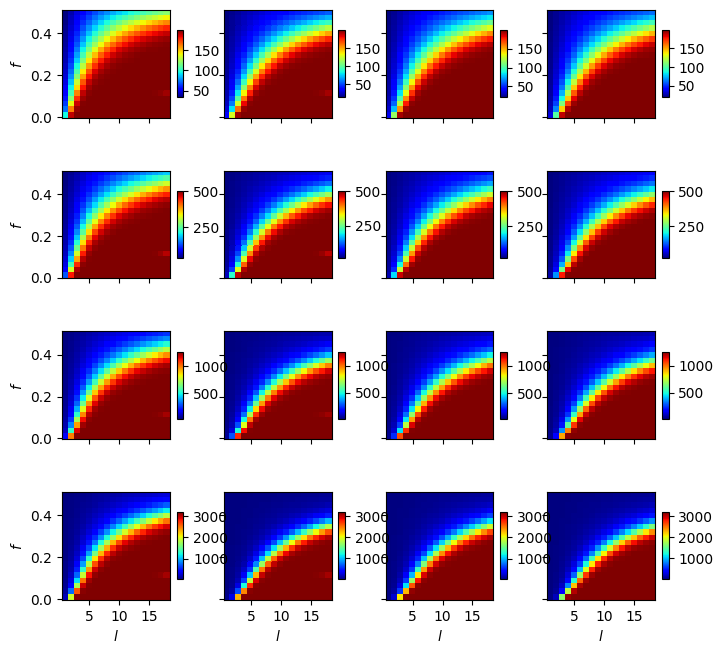

In [92]:
clrs=['r','g','b','m']
#chosenpidx=4
oid=9
fig,ax=plt.subplots(4,4,figsize=(8,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    
    for i, P in enumerate(Ps[[0,1,2,3]]):
        N=P*2
        filename='exp_theory_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        eta2=st['etas'][:,:,1:]
        eted=np.square(np.sum(eta2,axis=2))/np.sum(np.square(eta2),axis=2)
        
        im=ax[i][j].pcolor(st['Ls']-1,st['pas'],eted,cmap='jet')#,vmax=0.1,vmin=0.05)#,vmax=0.1,vmin=0.07)
        cb=plt.colorbar(im,ax=ax[i][j],aspect=10,shrink=0.5)#,orientation='horizontal')
        
        #fig,ax=plt.subplots(1,1,figsize=(5,3))
        #ax.plot(VT2.reshape(-1,N).T)
        #ax.set_yscale('log')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
        

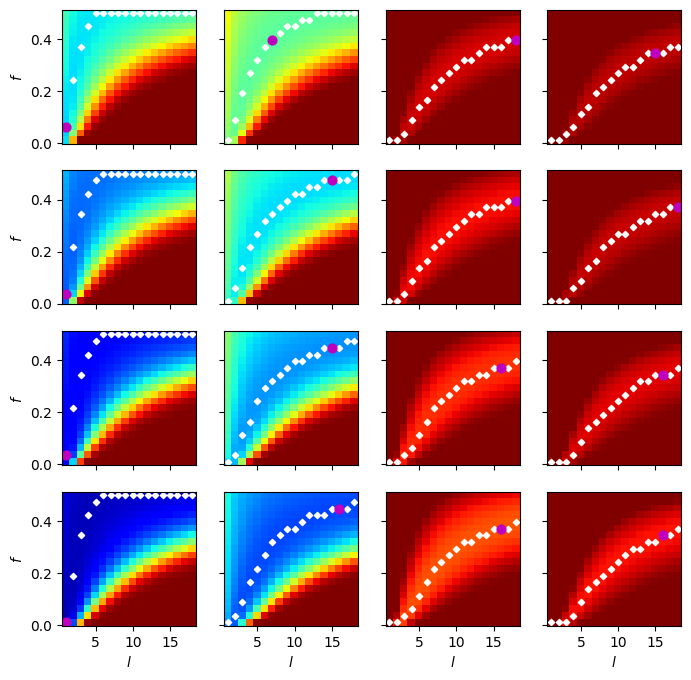

In [93]:
clrs=['r','g','b','m']
#chosenpidx=4
oid=9
fig,ax=plt.subplots(4,4,figsize=(8,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    
    for i, P in enumerate(Ps[[0,1,2,3]]):
        N=P*2
        filename='exp_theory_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        st=np.load('./sweep_data/'+filename)
        errTf=st['errTf']

        minid=np.argmin(errTf,axis=0)
        minerr=errTf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errTf.argmin(), errTf.shape)
        

        im=ax[i][j].pcolor(st['Ls']-1,st['pas'],errTf,cmap='jet',vmax=0.045,vmin=0.005)
        ax[i][j].scatter(st['Ls']-1,st['pas'][minid],c='w',marker='D',s=10)
        ax[i][j].scatter(st['Ls'][glomin[1]]-1,st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #fig,ax=plt.subplots(1,1,figsize=(5,3))
        #ax.plot(VT2.reshape(-1,N).T)
        #ax.set_yscale('log')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
        

FileNotFoundError: [Errno 2] No such file or directory: './sweep_data/gb_comp_exp_CIFAR_P10000_N20000_m0_s00_seed2.npz'

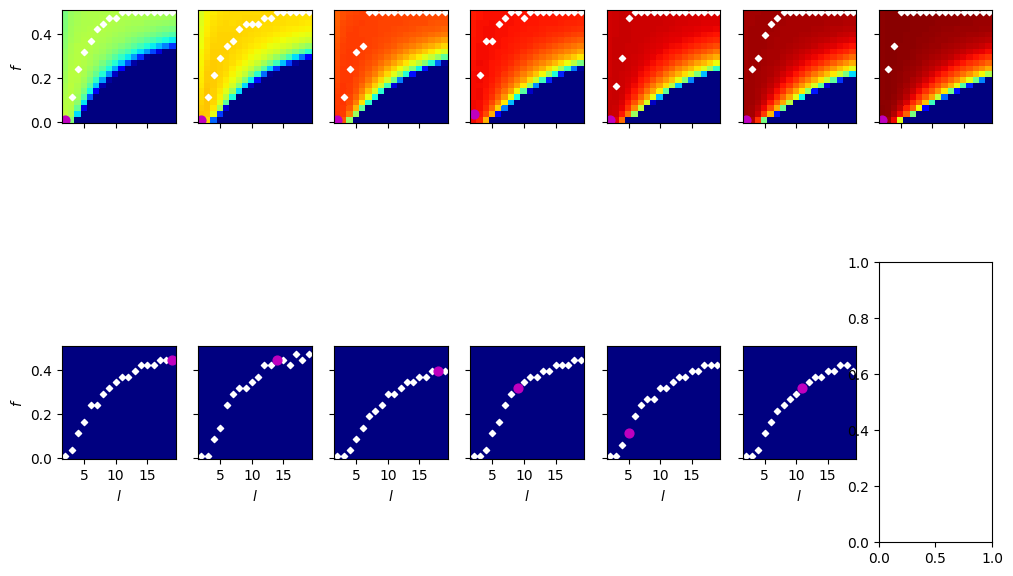

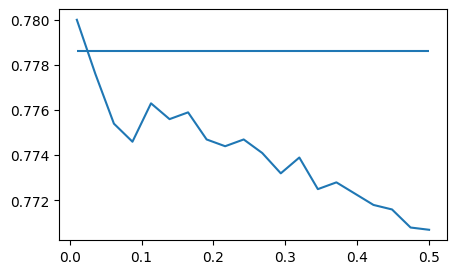

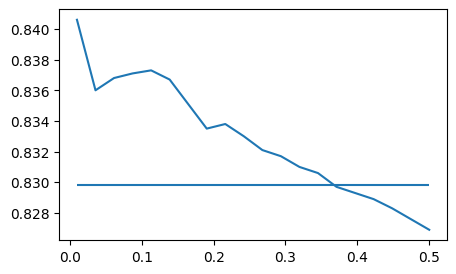

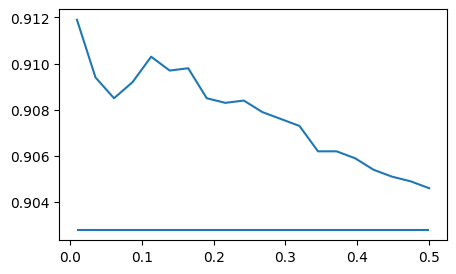

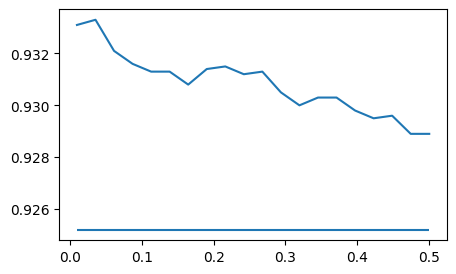

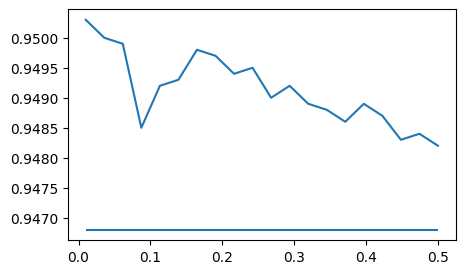

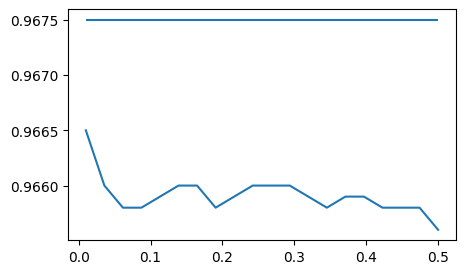

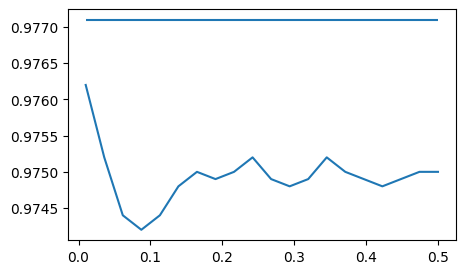

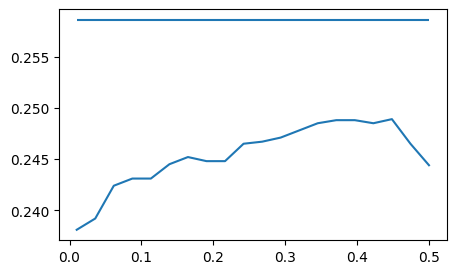

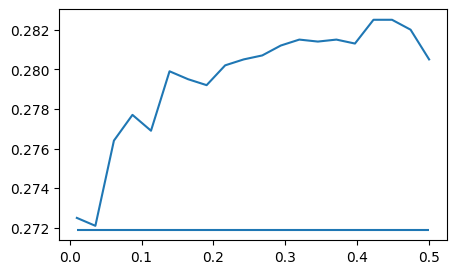

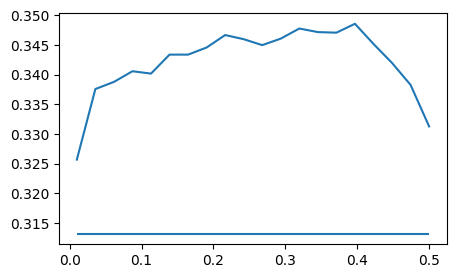

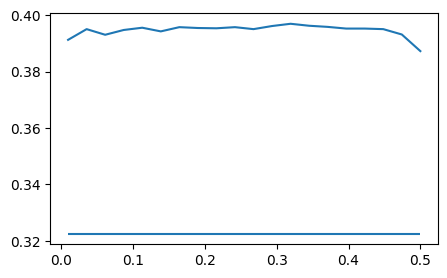

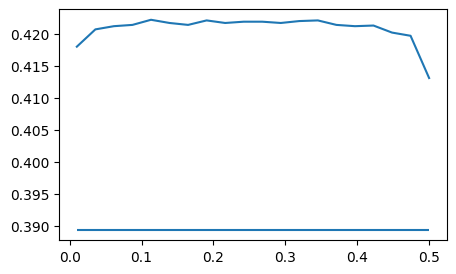

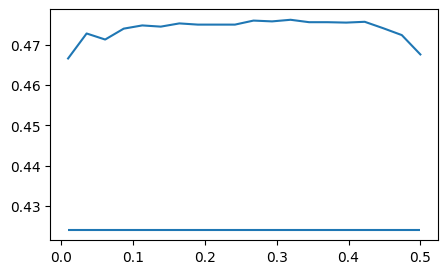

In [122]:
## GB COMPARISON


dotheory=False
m=0
s0=0

dataNames=['MNIST','CIFAR']

#NN MNIST

[0.7786,]

Ps=np.array([100,200,500,1000,2000,5000,10000])

MNIST_NN=[0.7786,0.8298,0.9028,0.9252,0.9468,0.9675,0.9771]
MNIST_GP=[0.7735,0.8282,0.8995,0.9279,0.9485,0.9692,0.9765]
CIFAR_NN=[0.2586,0.2719,0.3132,0.3225,0.3894,0.4241,0.4545]
CIFAR_GP=[0.2673,0.3022,0.3395,0.3608,0.3953,0.4454,0.4780]
GBNNlist=[MNIST_NN,CIFAR_NN]
GBGPlist=[MNIST_GP,CIFAR_GP]


fig,ax=plt.subplots(2,7,figsize=(12,8))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, P in enumerate(Ps):
        N=int(10000+P)
        #filename='gb_comp_'+'exp_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
        filename='gb_comp_'+'exp_'+dataName+'_P{}_N{}_m{}_s0{}_seed{}.npz'.format(P,N,m,s0,2)
        st=np.load('./sweep_data/'+filename)
        accAf=st['accAf']

        minid=np.argmax(accAf,axis=0)
        minerr=accAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(accAf.argmax(), accAf.shape)
        

        im=ax[j][i].pcolor(st['Ls'],st['pas'],accAf,cmap='jet',vmax=0.98,vmin=0.5)
        ax[j][i].scatter(st['Ls'],st['pas'][minid],c='w',marker='D',s=10)
        ax[j][i].scatter(st['Ls'][glomin[1]],st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if j<np.shape(dataNames)[0]-1:
            ax[j][i].xaxis.set_ticklabels([])
        else:
            ax[j][i].set_xlabel(r'$l$')
        if i>0:
            ax[j][i].yaxis.set_ticklabels([])
        else:
            ax[j][i].set_ylabel(r'$f$')
        ax[j][i].set_box_aspect(1)
        
        maxAcc_per_f=accAf[np.arange(np.shape(pas)[0]),np.argmax(accAf,axis=1)]
        figs,axs=plt.subplots(1,1,figsize=(5,3))
        axs.plot(pas,maxAcc_per_f)
        axs.hlines(GBNNlist[j][i],np.min(pas),np.max(pas))
        
    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

x1=0.92
y1=0.12
w1=0.008
h1=0.15
cax = fig.add_axes([x1,y1,w1,h1])
plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')



In [226]:
Ps=np.power(2,np.linspace(4,12,6)).astype(int)
Ns=5*Ps
print(Ps)
print(Ns)


[  16   48  147  445 1351 4096]
[   80   240   735  2225  6755 20480]


In [248]:
Ps=np.power(2,np.linspace(4,11,6)).astype(int)
print(Ps)
print(Ps*10)


[  16   42  111  294  776 2048]
[  160   420  1110  2940  7760 20480]


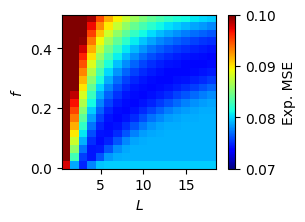

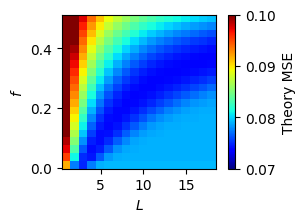

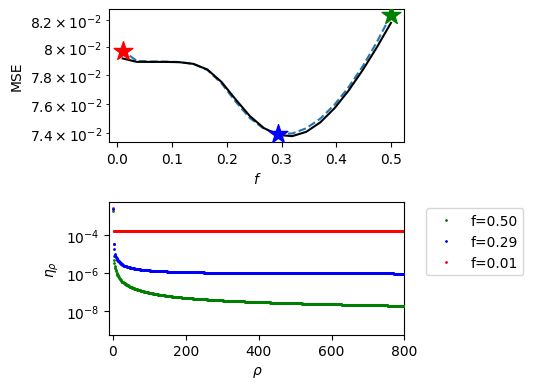

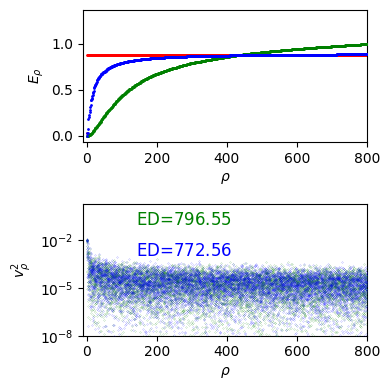

In [219]:
#P=631 #100,   252,   631,  1585,  3982, 10000
#N=2*P
#P=1000
#N=1200
P=362#[  16   48  147  445 1351 4096] #362*10
N=P*8#[   80   240   735  2225  6755 20480]
m=0
s0=0
dataName='CIFARG'
#dataName='MNIST'
#dataName='Fashion'
Nes=np.arange(N)
filename='exp_theory_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
#filename='withacc_exp_theory_'+dataName+'_P{}_N{}_m{}_s0{}.npz'.format(P,N,m,s0)
#filename='ZEROMEAN_EXP_withacc_exp_theory_CIFAR_P631_N1262_m0_s00.npz'
#filename='withacc_exp_theory_CIFAR_P631_N1262_m0_s00.npz'
#filename='AC_withacc_exp_theory_CIFAR_P600_N1200_m0_s00.npz'
st=np.load('./sweep_data/'+filename)
errAf=st['errAf']
errTf=st['errTf']
ERO=st['ERO']
etas=st['etas']
VT=st['VT']
Ls=st['Ls']
pas=st['pas']

vmaxv=0.10
vminv=0.07

Lidx=12

emax=800
Ns=np.arange(N)


fig,ax=plt.subplots(1,1,figsize=(3,2))
im=ax.pcolor(Ls-1,pas,(errAf),cmap='jet',vmax=vmaxv,vmin=vminv)
#im=ax.pcolor(Ls-1,pas,(errAf),cmap='jet')#,vmax=vmaxv,vmin=vminv)
cb=fig.colorbar(im, ax=ax)
cb.set_label('Exp. MSE')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$f$')
ax.set_box_aspect(1)


fig,ax=plt.subplots(1,1,figsize=(3,2))
im=ax.pcolor(Ls-1,pas,(errTf),cmap='jet',vmax=vmaxv,vmin=vminv)
#im=ax.pcolor(Ls-1,pas,(errTf),cmap='jet')#,vmax=vmaxv,vmin=vminv)
cb=fig.colorbar(im, ax=ax)
cb.set_label('Theory MSE')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$f$')
ax.set_box_aspect(1)



fig,ax=plt.subplots(2,1,figsize=(5.5,4))
ax[0].plot(pas,errAf[:,Lidx],'--',markersize=5)
ax[0].plot(pas,errTf[:,Lidx],'k-',markersize=5)
#ax.plot(errAf[idx,:],c='k')
#ax.plot(errTf[idx,:],c='r')
ax[0].set_yscale('log')
ax[0].set_ylabel('MSE')

fidx0=0
fidx1=np.argmin(errAf[:,Lidx])
fidx2=-1

ax[0].scatter(pas[fidx0],errAf[fidx0,Lidx],c='g',marker='*',s=200,zorder=10)
ax[0].scatter(pas[fidx1],errAf[fidx1,Lidx],c='b',marker='*',s=200,zorder=10)
ax[0].scatter(pas[fidx2],errAf[fidx2,Lidx],c='r',marker='*',s=200,zorder=10)


#fig,ax=plt.subplots(1,1,figsize=(5,3))
ax[1].plot(Ns+1,etas[fidx0,Lidx,:],'o',c='g',zorder=10,markersize=1,label='f={:.2f}'.format(pas[fidx0]))
ax[1].plot(Ns+1,etas[fidx1,Lidx,:],'o',c='b',zorder=10,markersize=1,label='f={:.2f}'.format(pas[fidx1]))
ax[1].plot(Ns+1,etas[fidx2,Lidx,:],'o',c='r',zorder=0,markersize=1,label='f={:.2f}'.format(pas[fidx2]))
ax[1].set_yscale('log')
#ax.set_xscale('log')
ax[1].set_ylabel(r'$\eta_\rho$')

ax[1].set_xlim([-10,emax])

ax[0].set_xlabel(r'$f$')
ax[1].set_xlabel(r'$\rho$')
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()



fig,ax=plt.subplots(2,1,figsize=(4,4))
#fig,ax=plt.subplots(1,1,figsize=(5,3))
ax[0].plot(Ns+1,ERO[fidx0,Lidx,:],'o',c='g',zorder=10,markersize=1,label='f={:.2f}'.format(pas[fidx0]))
ax[0].plot(Ns+1,ERO[fidx1,Lidx,:],'o',c='b',zorder=10,markersize=1,label='f={:.2f}'.format(pas[fidx1]))
ax[0].plot(Ns+1,ERO[fidx2,Lidx,:],'o',c='r',zorder=0,markersize=1,label='f={:.2f}'.format(pas[fidx2]))
#ax.set_xscale('log')
#ax.set_yscale('log')
ax[0].set_ylabel(r'$E_\rho$')
#ax[0].legend()


#ax.set_ylim([0.48,0.53])
#fig,ax=plt.subplots(1,1,figsize=(5,3))
#ax[1].plot(Ns+1,np.square(vteach),'o',c='k',zorder=10,markersize=3)
ax[1].plot(Nes+1,np.square(VT[fidx0,Lidx,:]),'o',c='g',zorder=10,markersize=0.1)
ax[1].plot(Nes+1,np.square(VT[fidx1,Lidx,:]),'o',c='b',zorder=10,markersize=0.1)
#ax.set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim([1e-8,2])
ax[1].set_ylabel(r'$v^2_\rho$')


ax[0].set_xlim([-10,emax])
ax[1].set_xlim([-10,emax])
ax[0].set_xlabel(r'$\rho$')
ax[1].set_xlabel(r'$\rho$')

v2=np.square(VT[fidx0,Lidx,:])
ED=np.square(np.sum(v2))/np.sum(np.square(v2))
plt.text(140,1e-1 ,r'ED=${:.2f}$'.format(ED),
         fontsize=12,c='g')

v2=np.square(VT[fidx1,Lidx,:])
ED=np.square(np.sum(v2))/np.sum(np.square(v2))
plt.text(140,1e-3 ,r'ED=${:.2f}$'.format(ED),
         fontsize=12,c='b')

plt.tight_layout()





Text(1000, 0.3, 'AUC=$0.6333$')

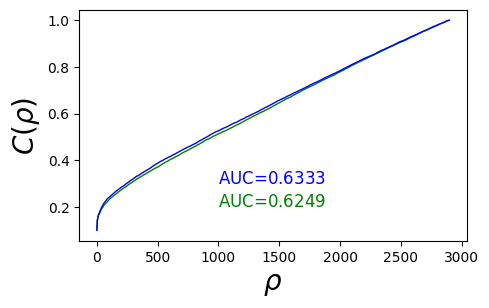

In [220]:
#ax.set_ylim([0.48,0.53])
fig,ax=plt.subplots(1,1,figsize=(5,3))
#ax[1].plot(Ns+1,np.square(vteach),'o',c='k',zorder=10,markersize=3)
v2v=np.squeeze(np.square(VT[fidx0,Lidx,:]))#[:,outid]
ctma=np.cumsum(v2v,axis=0)/np.sum(v2v,axis=0)
ax.plot(Nes+1,np.mean(ctma,axis=1),c='g',zorder=10,lw=1)
AUC0=np.mean(np.mean(ctma,axis=1))
v2v=np.squeeze(np.square(VT[fidx1,Lidx,:]))#[:,outid]
ctma=np.cumsum(v2v,axis=0)/np.sum(v2v,axis=0)
ax.plot(Nes+1,np.mean(ctma,axis=1),c='b',zorder=10,lw=1)
AUC1=np.mean(np.mean(ctma,axis=1))
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim([1e-8,2])
ax.set_ylabel(r'$C(\rho)$',fontsize=20)
ax.set_xlabel(r'$\rho$',fontsize=20)
#ax.set_xlim([-10,emax])


plt.text(1000,0.2 ,r'AUC=${:.4f}$'.format(AUC0),
         fontsize=12,c='g')


plt.text(1000,0.3 ,r'AUC=${:.4f}$'.format(AUC1),
         fontsize=12,c='b')


In [206]:


100
200
500
1000
2000
5000
10000
20000
50000

MNIST NN
0.7786
0.8298
0.9028
0.9252
0.9468
0.9675
0.9771
0.9825 
0.9864

MNIST GP
0.7735
0.8282
0.8995
0.9279
0.9485 
0.9692
0.9765
0.9830
0.9875

CIFAR NN
0.2586
0.2719
0.3132
0.3225
0.3894
0.4241
0.4545
0.5041
0.5313

CIFAR GP
0.2673
0.3022
0.3395
0.3608
0.3953
0.4454
0.4780
0.5118
0.5566


MNIST:100 NN-2-5000-0.10-0.11 0.7786 NN-1-500-1.48-0.61 0.7766
GP-100-1.79-0.83 0.7735 GP-100-3.14-0.97 0.7736
MNIST:200 NN-2-2000-0.52-0.00 0.8298 NN-2-1000-1.80-1.99 0.8223
GP-100-1.79-0.83 0.8282 GP-100-3.99-2.00 0.8277
MNIST:500 NN-2-5000-1.82-0.77 0.9028 NN-1-5000-3.74-2.18 0.9001
GP-100-1.79-0.83 0.8995 GP-50-3.48-1.86 0.9008
MNIST:1k NN-2-5000-3.19-0.00 0.9252 NN-2-1000-0.60-0.00 0.9254
GP-20-1.45-0.28 0.9279 GP-20-1.96-0.62 0.9266
MNIST:2k NN-2-5000-2.88-0.01 0.9468 NN-1-2000-0.98-1.30 0.9462
GP-10-1.11-0.55 0.9485 GP-10-1.79-1.45 0.9477
MNIST:5k NN-3-500-2.92-0.22 0.9675 NN-2-1000-4.12-2.18 0.9655
GP-7-0.61-0.07 0.9692 GP-3-1.11-0.00 0.9693
MNIST:10k NN-2-2000-0.42-0.16 0.9771 NN-2-2000-2.41-1.84 0.9745
GP-7-0.61-0.07 0.9765 GP-2-1.62-0.28 0.9773
MNIST:20k NN-3-1000-2.45-0.98 0.9825 NN-2-2000-0.21-0.10 0.9814
GP-5-1.62-0.83 0.9830 GP-1-2.63-0.00 0.9836
MNIST:50k NN-2-2000-0.60-0.44 0.9864 NN-2-5000-0.28-0.34 0.9857
GP-1-0.10-0.48 0.9875 GP-1-1.28-0.00 0.9879

CIFAR:100 NN-5-500-1.88-1.00 0.2586 NN-2-200-3.22-2.09 0.2470
GP-3-4.49-0.97 0.2673 GP-10-3.65-1.17 0.2718
CIFAR:200 NN-3-200-0.17-0.00 0.2719 NN-3-200-1.41-0.21 0.2686
GP-3-3.99-1.72 0.3022 GP-7-3.65-0.55 0.2927
CIFAR:500 NN-1-100-1.26-0.63 0.3132 NN-1-2000-0.11-0.90 0.2939
GP-20-1.79-0.21 0.3395 GP-7-3.65-0.62 0.3291
CIFAR:1k NN-5-500-1.29-0.28 0.3225 NN-1-200-1.45-0.12 0.3378
GP-7-1.28-0.00 0.3608 GP-50-2.97-0.97 0.3702
CIFAR:2k NN-3-5000-5.59-0.57 0.3894 NN-5-1000-0.86-1.28 0.3597
GP-3-4.16-1.17 0.3953 GP-5-4.66-1.03 0.3959
CIFAR:5k NN-5-2000-5.26-1.74 0.4241 NN-1-5000-0.07-0.22 0.3993
GP-3-4.66-1.03 0.4454 GP-10-3.65-1.38 0.4430
CIFAR:10k NN-5-2000-1.60-1.07 0.4545 NN-1-500-1.48-1.59 0.4429
GP-5-2.97-0.28 0.4780 GP-7-3.48-2.00 0.4766
CIFAR:20k NN-3-5000-4.18-0.18 0.5041 NN-2-5000-0.02-1.12 0.4565
GP-3-5.00-0.83 0.5118 GP-7-3.14-1.93 0.5124
CIFAR:45k NN-3-5000-0.53-0.01 0.5313 NN-2-2000-1.05-2.08 0.5034
GP-3-3.31-1.86 0.5566 GP-3-3.48-1.52 0.5558

SyntaxError: invalid syntax (3705925804.py, line 11)

[  100   252   631  1585  3982 10000]


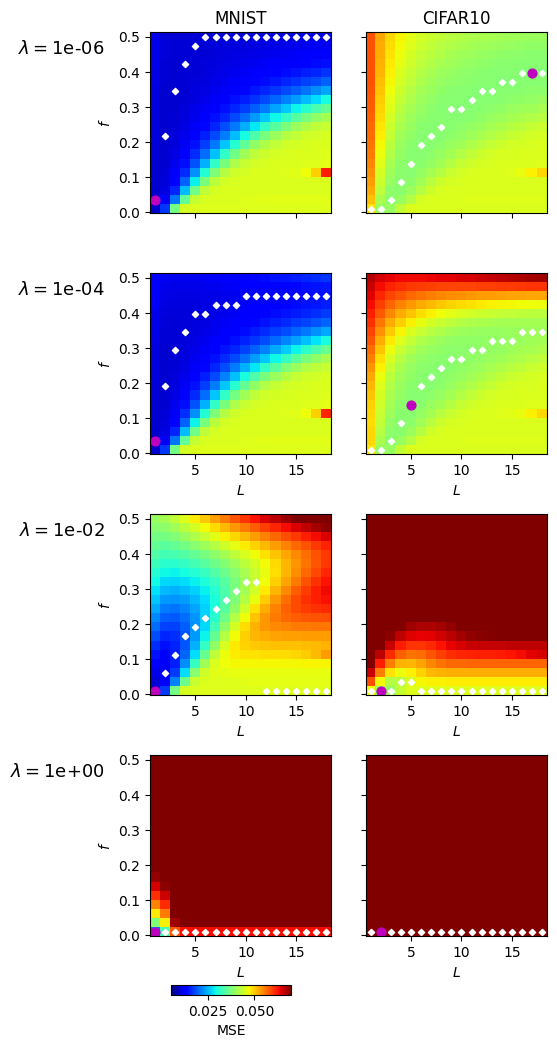

In [144]:
#Appendix: lambda sensitivity

m=0
s0s=np.power(10,np.linspace(-6,0,4))

dataNames=['MNIST','CIFAR']

P=1000
N=2*P

print(Ps)

#fig,ax=plt.subplots(6,4,figsize=(6,9))
fig,ax=plt.subplots(4,2,figsize=(6,10))
for j,dataName in enumerate(dataNames):
#dataName=dataNames[1]
    for i, s0 in enumerate(s0s):
        #filename='withacc_exp_'+dataName+'_P{}_N{}_m{}.npz'.format(P,N,m)
        filename='lamb_comp_exp_'+dataName+'_P{}_N{}_m{}_s0{:.2e}'.format(P,N,m,s0) + '_seed0.npz'
        st=np.load('./sweep_data/'+filename)
        errAf=st['errAf']

        minid=np.argmin(errAf,axis=0)
        minerr=errAf[minid,np.arange(np.shape(Ls)[0])]
        glomin=np.unravel_index(errAf.argmin(), errAf.shape)
        

        im=ax[i][j].pcolor(st['Ls']-1,st['pas'],errAf,cmap='jet',vmax=0.07,vmin=0.005)
        ax[i][j].scatter(st['Ls']-1,st['pas'][minid],c='w',marker='D',s=10)
        ax[i][j].scatter(st['Ls'][glomin[1]]-1,st['pas'][glomin[0]],c='m',marker='o',s=40)
        
        #ax[j][i].plot(minerr,c='k')
        #cb=fig.colorbar(im, ax=ax[i])
        #cb.set_label('err experiment')
        #ax[i].set_xlabel('L')
        #ax[i].set_ylabel('f')
        if i<np.shape(ax)[1]-1:
            ax[i][j].xaxis.set_ticklabels([])
        else:
            ax[i][j].set_xlabel(r'$L$')
        if j>0:
            ax[i][j].yaxis.set_ticklabels([])
        else:
            ax[i][j].set_ylabel(r'$f$')
            ax[i][0].text(-4, 0.45, r'$\lambda=${:.0e}'.format(s0), fontsize=13, horizontalalignment='right')
        ax[i][j].set_box_aspect(1)
        #ax[i][0].set_title('P={}'.format(Ps[i]), loc='left')

        
#fig.subplots_adjust(left=0.25)

    #plt.tight_layout()
#ax[-1][0].set_xlabel(r'$l$')
#ax[-1][0].set_ylabel(r'$f$')

ax[0][0].set_title('MNIST')
ax[0][1].set_title('CIFAR10')
plt.tight_layout()

x1=0.3
y1=0.0
w1=0.2
h1=0.01
cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5,orientation='horizontal')
cb.set_label('MSE')


In [ ]:
lamb_comp_exp_MNIST_P1000_N2000_m0_s01.00e-06_seed0.npz